In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df_Control = pd.read_excel("ab_testing.xlsx", sheet_name="Control Group")

In [3]:
df_Test = pd.read_excel("ab_testing.xlsx", sheet_name="Test Group")

In [4]:
df_Test.head()

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752


In [5]:
df_Control.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [6]:
df_Test.columns=[col+"_Test" for col in df_Test.columns]

In [7]:
df_Test

,Impression_Test,Click_Test,Purchase_Test,Earning_Test
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752
...,...,...,...,...
35,79234.91193,6002.21358,382.04712,2277.86398
36,130702.23941,3626.32007,449.82459,2530.84133
37,116481.87337,4702.78247,472.45373,2597.91763
38,79033.83492,4495.42818,425.35910,2595.85788


In [8]:
df_Control.columns=[col+"_Control" for col in df_Control.columns]

In [9]:
df_Control

,Impression_Control,Click_Control,Purchase_Control,Earning_Control
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018
...,...,...,...,...
35,132064.21900,3747.15754,551.07241,2256.97559
36,86409.94180,4608.25621,345.04603,1781.35769
37,123678.93423,3649.07379,476.16813,2187.72122
38,101997.49410,4736.35337,474.61354,2254.56383


In [10]:
def check_df(dataframe):
    print("######################## shape ########################")
    print(dataframe.shape)
    print("######################## dtypes ########################")
    print(dataframe.dtypes)
    print("######################## head ########################")
    print(dataframe.head())
    print("######################## tail ########################")
    print(dataframe.tail())
    print("######################## isnull.sum() ########################")
    print(dataframe.isnull().sum())
    print("######################## Quantiles ########################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [11]:
df_Control.corr()

,Impression_Control,Click_Control,Purchase_Control,Earning_Control
Impression_Control,1.00000,-0.31149,0.21457,0.10705
Click_Control,-0.31149,1.00000,0.05740,-0.35669
Purchase_Control,0.21457,0.05740,1.00000,0.06173
Earning_Control,0.10705,-0.35669,0.06173,1.00000


In [12]:
check_df(df_Test)

######################## shape ########################
(40, 4)
######################## dtypes ########################
Impression_Test    float64
Click_Test         float64
Purchase_Test      float64
Earning_Test       float64
dtype: object
######################## head ########################
   Impression_Test  Click_Test  Purchase_Test  Earning_Test
0     120103.50380  3216.54796      702.16035    1939.61124
1     134775.94336  3635.08242      834.05429    2929.40582
2     107806.62079  3057.14356      422.93426    2526.24488
3     116445.27553  4650.47391      429.03353    2281.42857
4     145082.51684  5201.38772      749.86044    2781.69752
######################## tail ########################
    Impression_Test  Click_Test  Purchase_Test  Earning_Test
35      79234.91193  6002.21358      382.04712    2277.86398
36     130702.23941  3626.32007      449.82459    2530.84133
37     116481.87337  4702.78247      472.45373    2597.91763
38      79033.83492  4495.42818      425.35

In [13]:
check_df(df_Control)

######################## shape ########################
(40, 4)
######################## dtypes ########################
Impression_Control    float64
Click_Control         float64
Purchase_Control      float64
Earning_Control       float64
dtype: object
######################## head ########################
   Impression_Control  Click_Control  Purchase_Control  Earning_Control
0         82529.45927     6090.07732         665.21125       2311.27714
1         98050.45193     3382.86179         315.08489       1742.80686
2         82696.02355     4167.96575         458.08374       1797.82745
3        109914.40040     4910.88224         487.09077       1696.22918
4        108457.76263     5987.65581         441.03405       1543.72018
######################## tail ########################
    Impression_Control  Click_Control  Purchase_Control  Earning_Control
35        132064.21900     3747.15754         551.07241       2256.97559
36         86409.94180     4608.25621         345.04603  

In [14]:
df=pd.concat([df_Test,df_Control], axis=1)

In [15]:
check_df(df)

######################## shape ########################
(40, 8)
######################## dtypes ########################
Impression_Test       float64
Click_Test            float64
Purchase_Test         float64
Earning_Test          float64
Impression_Control    float64
Click_Control         float64
Purchase_Control      float64
Earning_Control       float64
dtype: object
######################## head ########################
   Impression_Test  Click_Test  Purchase_Test  Earning_Test  \
0     120103.50380  3216.54796      702.16035    1939.61124   
1     134775.94336  3635.08242      834.05429    2929.40582   
2     107806.62079  3057.14356      422.93426    2526.24488   
3     116445.27553  4650.47391      429.03353    2281.42857   
4     145082.51684  5201.38772      749.86044    2781.69752   

   Impression_Control  Click_Control  Purchase_Control  Earning_Control  
0         82529.45927     6090.07732         665.21125       2311.27714  
1         98050.45193     3382.86179       

<AxesSubplot:xlabel='Purchase_Test', ylabel='Count'>

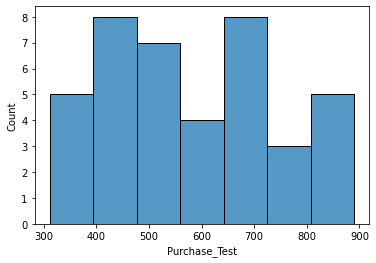

In [16]:
sns.histplot(df["Purchase_Test"])

<AxesSubplot:xlabel='Purchase_Control', ylabel='Count'>

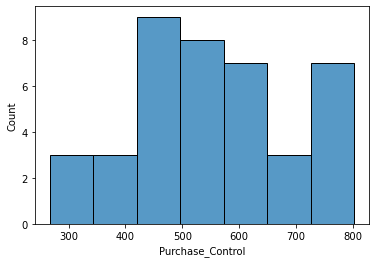

In [17]:
sns.histplot(df["Purchase_Control"])

<AxesSubplot:ylabel='Frequency'>

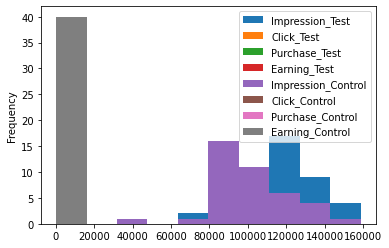

In [18]:
df.plot(kind="hist")

<AxesSubplot:xlabel='Purchase_Test', ylabel='Purchase_Control'>

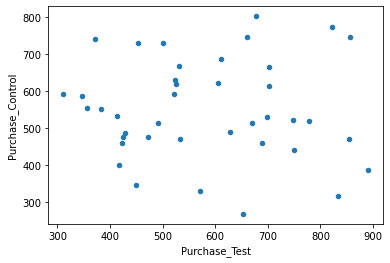

In [19]:
df.plot(kind="scatter", x="Purchase_Test", y="Purchase_Control")

#    Defining of Hypothesis of AB_Testing
Step_1 

HO: M1 = M2(Average_Bidding teklif verme türü ile maximum_bidding teklif verme türü arasında anlamlı bir farklılık yoktur.)

H1: M1 != M2(.....vardır)

# Normality Assumption
#H0: Its has normality distribution

#H1: Its has no normality distribution

In [20]:
df["Purchase_Control"].mean()


550.8940587702316

In [21]:
df["Purchase_Test"].mean()

582.1060966484675

In [22]:
shapiro(df["Purchase_Test"])[1]

0.15413185954093933

In [23]:
shapiro(df["Purchase_Control"])[1]

0.5891125202178955

#In this situation, both p_values are greater than 0.05. Therefore, there is normality distribution in here.

#   Variance Homogeneity Assumption

#H0: Variances are homogeneous

#H1: Variances are "not" homogenous

In [24]:
levene(df["Purchase_Test"],df["Purchase_Control"])[1]

0.10828588271874791

#p_value is greater than 0.05. Therefore, there is Variance Homogeneity. So H0 variances are homogeneous.

when normality assumption and variance homogeneity are examined, we saw that p_values are greater than 0.05. Thus, t_test is applied to relating columns

In [25]:
ttest_ind(df["Purchase_Test"],df["Purchase_Control"], equal_var = True)[1]

0.34932579202108416

p_values = 0.34932579202108416 > 0.05. H0 CANNOT BE REJECTED. 